### Posterior Time Evolution

TODO: Use the following resources to implement a time evolution of the posterior density of the best Gaussian process model for a given dataset.

- https://matplotlib.org/gallery/animation/bayes_update.html
- https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import GPy

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

## Create Dummy Data

In [3]:
x = np.arange(100)[:, None]
y = np.sin(x)
np.hstack((x, y)).shape

(100, 2)

## Plot Posterior Evolution

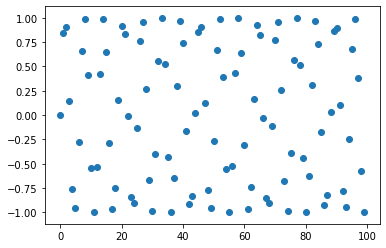

In [9]:
k1 = GPy.kern.RBF(1, active_dims=[0])
m1 = GPy.models.GPRegression(x, y, kernel=k1)
m1.optimize()

k2 = GPy.kern.RationalQuadratic(1, active_dims=[0])
m2 = GPy.models.GPRegression(x, y, kernel=k2)
m2.optimize()

models = [m1, m2]

class UpdateDensity:
    def __init__(self, ax, models):
        self.gp_mean_line, = ax.plot([], [], 'k-')
        x, y = models[0].X, models[0].Y
        self.x = x
        self.y = y
        self.models = models
        self.ax = ax

    def init(self):
        self.data_markers = ax.scatter(self.x, self.y)
        self.gp_mean_line.set_data([], [])
        return self.gp_mean_line, self.data_markers

    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if i == 0:
            return self.init()
        
        model = self.models[i - 1]
        gp_mean = model.posterior.mean[:, 0]
        
        # TODO: plot posterior density
        # density defaults: {'alpha': 0.5, 'color': '#729fcf'}
        gp_cov = model.posterior.covariance
        
        self.gp_mean_line.set_data(model.X, gp_mean)
        
        self.ax.set_title('Frame ' + str(i))
        self.ax.set_xlabel('Evaluation: ' + str(i))
        
        return self.gp_mean_line, self.data_markers

fig, ax = plt.subplots()
ud = UpdateDensity(ax, models)
animation = FuncAnimation(fig, ud, frames=np.arange(len(models) + 1), init_func=ud.init, interval=500, blit=True)

In [8]:
HTML(animation.to_jshtml())

{'dataplot': [<matplotlib.collections.PathCollection at 0x223ab0179b0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x223ac3b1d30>]],
 'gpdensity': [[<matplotlib.collections.PolyCollection at 0x223ab017080>]]}

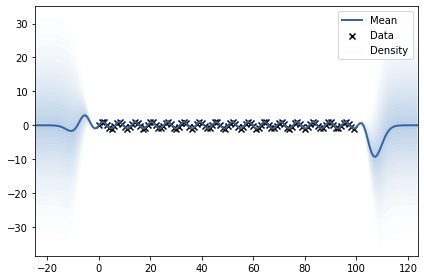

In [10]:
# TODO: create density plot like this.
m1.plot(plot_density=True)